In [1]:
#importamos las librearías que vamos a utilizar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from ydata_profiling import ProfileReport
import warnings

In [2]:
#Cargar DataSet
ruta_google = "C:\\Users\\licle\\Desktop\\PF\\DATA FRANSCISCO\\combined_metadata_sitios.parquet"

google_sitios = pd.read_parquet(ruta_google)

In [3]:
google_sitios.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,<NA>,32.388300,-83.357100,['Pharmacy'],4.9,16,<NA>,"[['Friday', '8AM–6PM'], ['Saturday', '8AM–12PM...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"['0x88f16e41929435cf:0x5b2532a2885e9ef6', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,<NA>,34.018891,-118.215290,['Textile exporter'],4.5,6,<NA>,<NA>,<NA>,Open now,"['0x80c2c624136ea88b:0xb0315367ed448771', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,<NA>,34.058092,-118.292130,['Korean restaurant'],4.4,18,<NA>,"[['Thursday', '6:30AM–6PM'], ['Friday', '6:30A...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"['0x80c2c78249aba68f:0x35bf16ce61be751d', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,<NA>,34.023669,-118.232930,['Fabric store'],3.3,6,<NA>,"[['Thursday', '9AM–5PM'], ['Friday', '9AM–5PM'...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"['0x80c2c8811477253f:0x23a8a492df1918f7', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,<NA>,34.036694,-118.249421,['Fabric store'],4.3,7,<NA>,"[['Thursday', '9AM–5PM'], ['Friday', '9AM–5PM'...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"['0x80c2c62c496083d1:0xdefa11317fe870a1', '0x8...",https://www.google.com/maps/place//data=!4m2!3...


In [4]:
google_sitios.shape

(3025011, 15)

In [5]:
#¿Hay datos nulos?
google_sitios.isnull().sum()

name                     37
address               80511
gmap_id                   0
description         2770722
latitude                  0
longitude                 0
category              17419
avg_rating                0
num_of_reviews            0
price               2749808
hours                787405
MISC                 690834
state                746455
relative_results     295058
url                       0
dtype: int64

In [7]:
#¿Se repiten los usuarios?
google_sitios.name.value_counts()

name
Subway                           9140
United States Postal Service     7388
Shell                            6615
U-Haul Neighborhood Dealer       4972
Walgreens                        4690
                                 ... 
Fort Wayne Auto Detailing           1
Ky's Auto Repair                    1
Mattress Firm University City       1
Bowen's Bbq and Burgers             1
Crestview Crossing                  1
Name: count, Length: 2308005, dtype: Int64

In [8]:
google_sitios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025011 entries, 0 to 3025010
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   name              string 
 1   address           string 
 2   gmap_id           string 
 3   description       string 
 4   latitude          float64
 5   longitude         float64
 6   category          string 
 7   avg_rating        float64
 8   num_of_reviews    int64  
 9   price             string 
 10  hours             string 
 11  MISC              string 
 12  state             string 
 13  relative_results  string 
 14  url               string 
dtypes: float64(3), int64(1), string(11)
memory usage: 346.2 MB


In [11]:
sumario = google_sitios.describe()
redondear_sumario = sumario.round(2)
print(redondear_sumario)

         latitude   longitude  avg_rating  num_of_reviews
count  3025011.00  3025011.00  3025011.00      3025011.00
mean        37.43      -92.34        4.30           43.63
std          5.42       16.36        0.71          143.00
min        -40.93     -178.81        1.00            1.00
25%         33.71      -99.26        4.00            7.00
50%         38.28      -87.60        4.50           17.00
75%         41.29      -80.30        4.80           43.00
max         87.86      180.00        5.00         9998.00


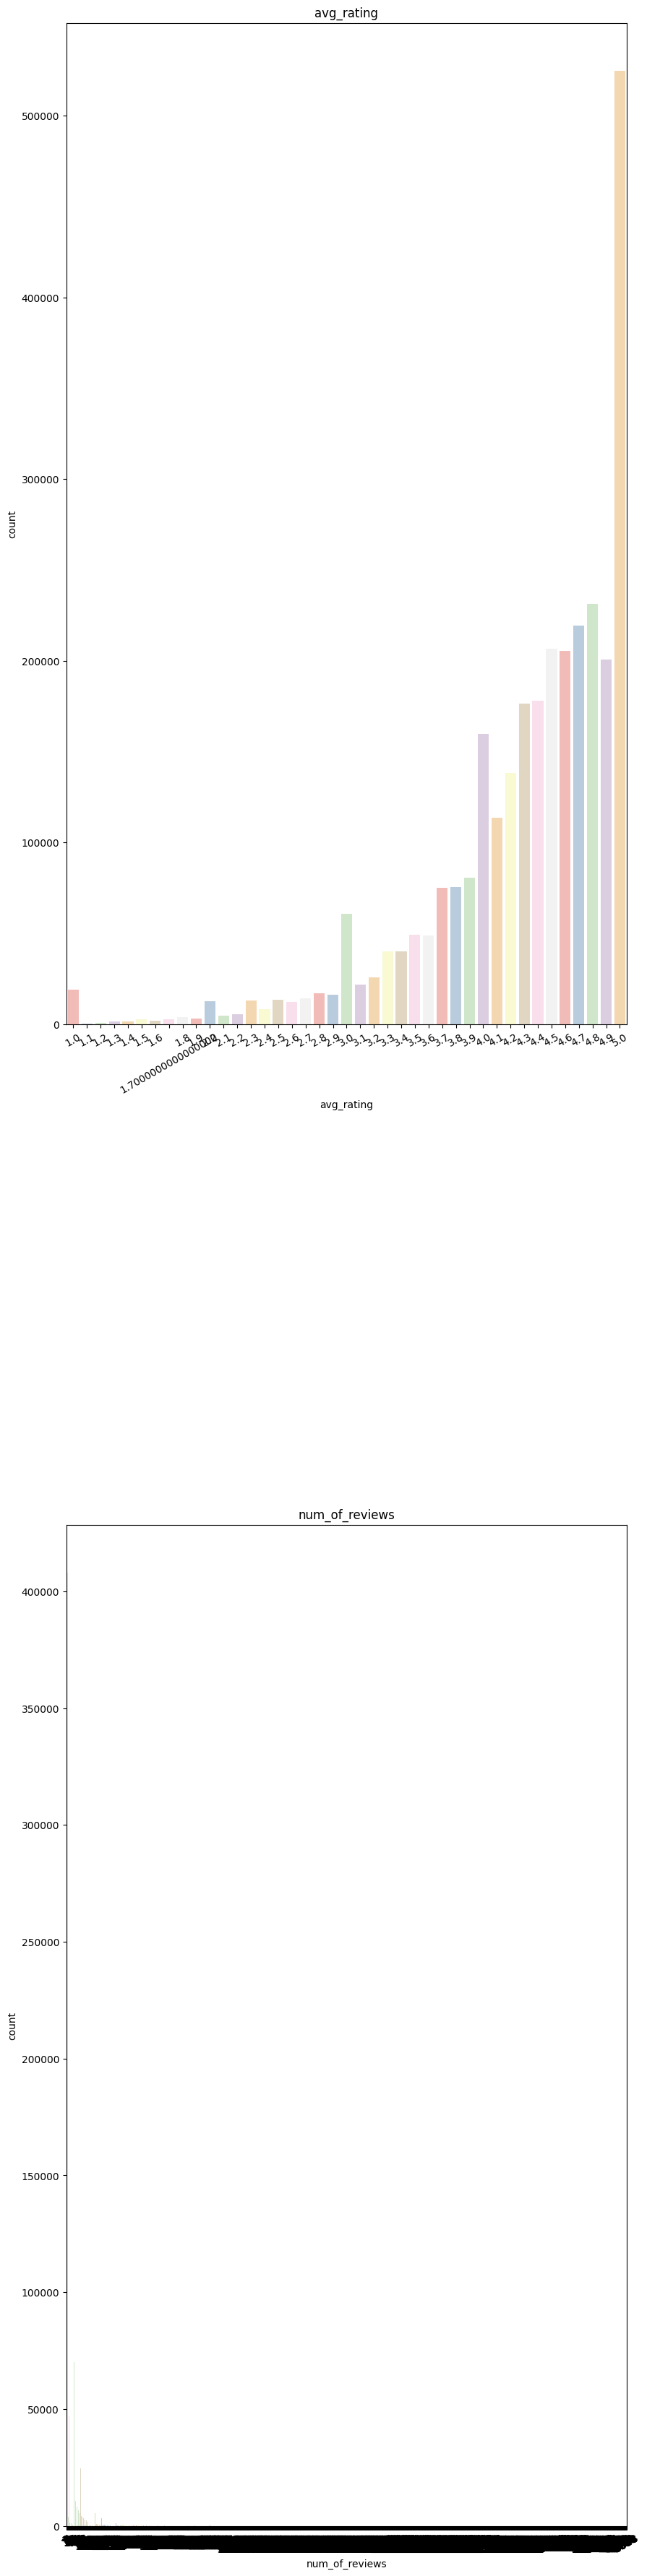

In [19]:
#Graficar subniveles de cada variable categórica
cols_cat = ["avg_rating","num_of_reviews"]

#Filtramos mensajes de advertencias para que nuestro resultado sea más prólijo
warnings.filterwarnings("ignore")

#Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(cols_cat),ncols =1, figsize=(10,45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=google_sitios,ax=ax[i], palette='Pastel1')
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

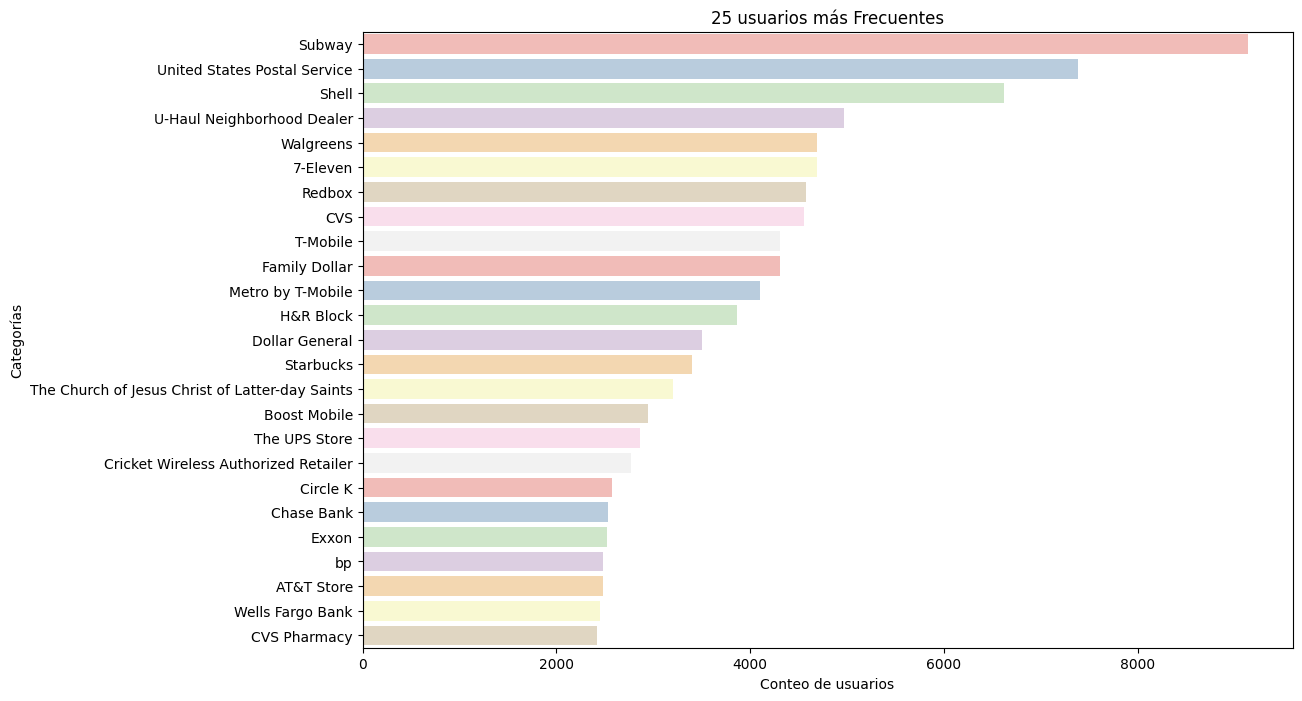

In [15]:
#reducimos a las primeras 25 más frecuentes para eso contamos las variables más repetidas y gráficamos
warnings.filterwarnings("ignore")

# Contar las los nombres repetidos 
categoria_counts = google_sitios['name'].value_counts()

# Seleccionar los 25 nombres más frecuentes
top_25_categorias = categoria_counts.head(25)

# Graficar los 25 nombres más frecuentes
plt.figure(figsize=(12, 8))
sns.barplot(x=top_25_categorias.values, y=top_25_categorias.index, palette='Pastel1')
plt.xlabel('Conteo de usuarios')
plt.ylabel('Categorías')
plt.title('25 usuarios más Frecuentes')
plt.show()

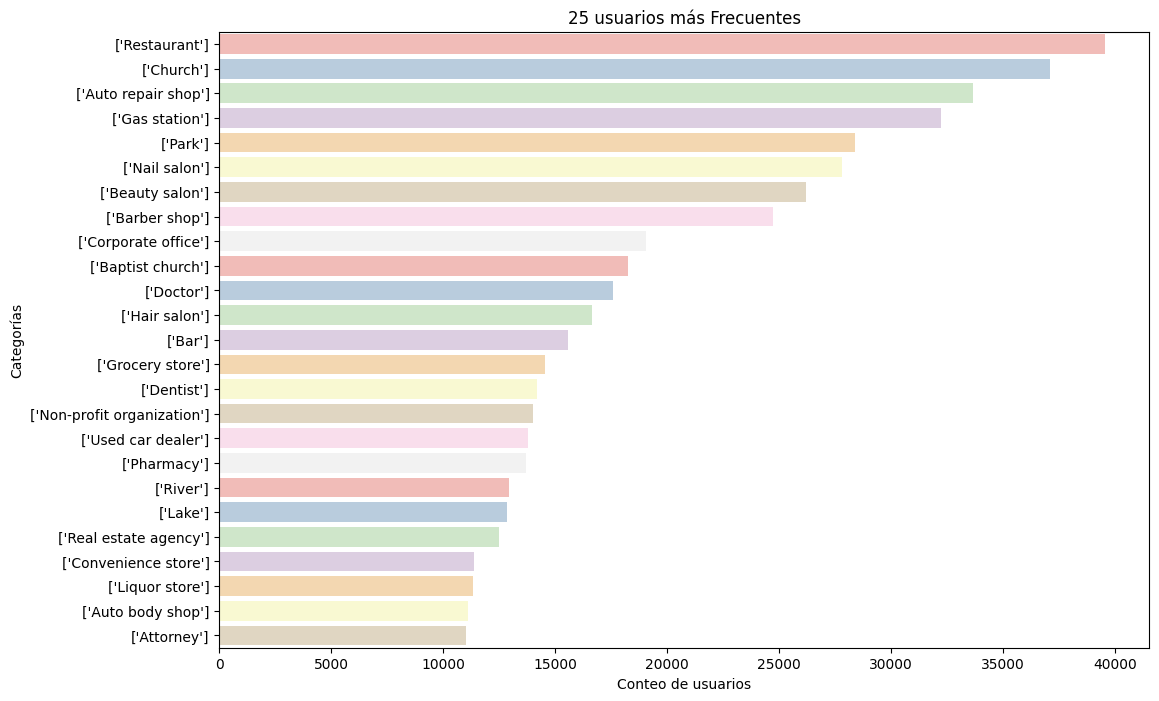

In [16]:
#reducimos a las primeras 25 más frecuentes para eso contamos las variables más repetidas y gráficamos
warnings.filterwarnings("ignore")

# Contar las categorías repetidas 
categoria_counts = google_sitios['category'].value_counts()

# Seleccionar los 25 nombres más frecuentes
top_25_categorias = categoria_counts.head(25)

# Graficar los 25 nombres más frecuentes
plt.figure(figsize=(12, 8))
sns.barplot(x=top_25_categorias.values, y=top_25_categorias.index, palette='Pastel1')
plt.xlabel('Conteo de usuarios')
plt.ylabel('Categorías')
plt.title('25 usuarios más Frecuentes')
plt.show()

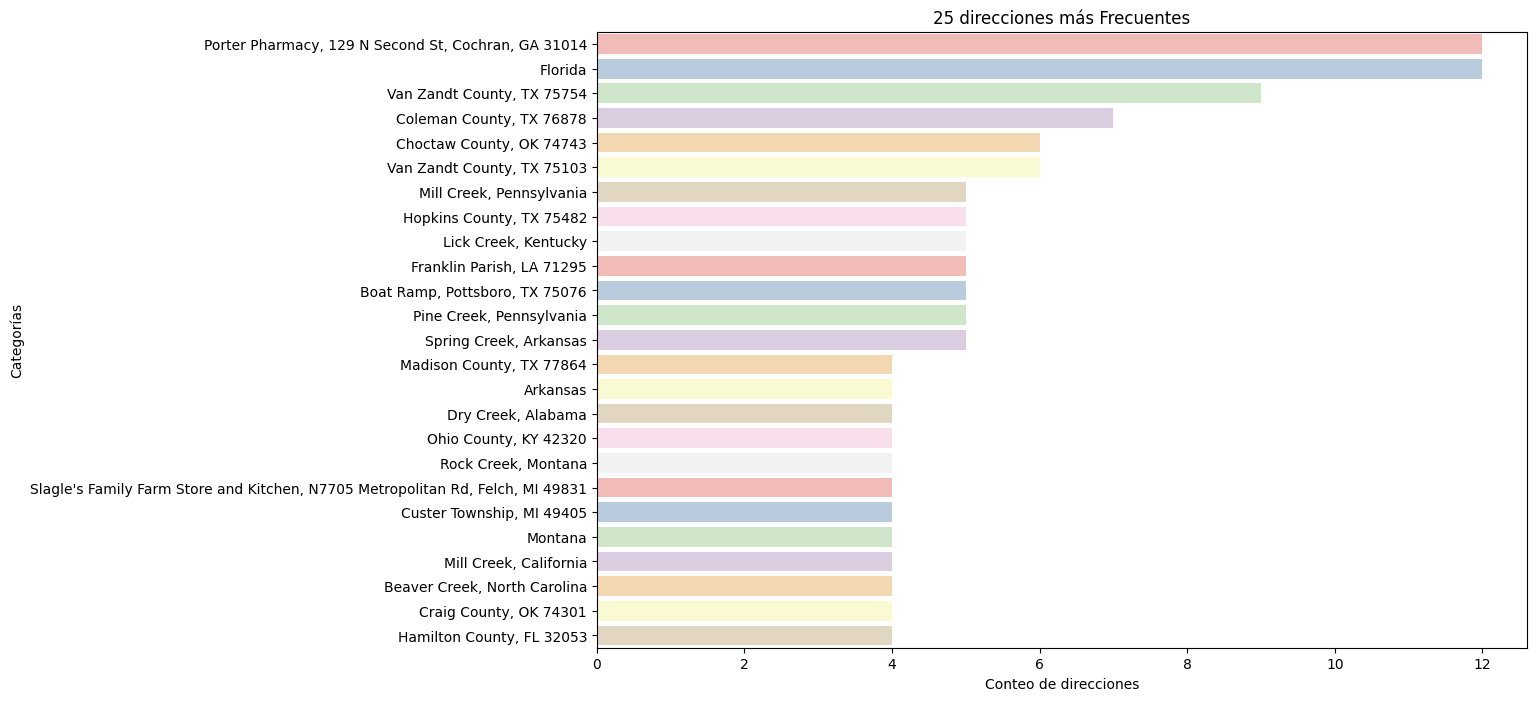

In [20]:
#reducimos a las primeras 25 más frecuentes para eso contamos las variables más repetidas y gráficamos
warnings.filterwarnings("ignore")

# Contar las direcciones repetidos 
categoria_counts = google_sitios['address'].value_counts()

# Seleccionar las 25 direcciones más frecuentes
top_25_categorias = categoria_counts.head(25)

# Graficar los 25 nombres más frecuentes
plt.figure(figsize=(12, 8))
sns.barplot(x=top_25_categorias.values, y=top_25_categorias.index, palette='Pastel1')
plt.xlabel('Conteo de direcciones')
plt.ylabel('Categorías')
plt.title('25 direcciones más Frecuentes')
plt.show()